<a href="https://colab.research.google.com/github/Hassan-jr/Tensorflow-Deep-Learning/blob/main/transfer_part_1_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get The Data

In [3]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

zip_ref=zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2023-03-04 07:11:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  18.8MB/s    in 9.9s    

2023-03-04 07:11:20 (16.3 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
import os

for dirpath,dirname, filename in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirname)} directories and {len(filename)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_10_percent
There are 10 directories and 0 images in 10_food_classes_10_percent/test
There are 0 directories and 250 images in 10_food_classes_10_percent/test/grilled_salmon
There are 0 directories and 250 images in 10_food_classes_10_percent/test/sushi
There are 0 directories and 250 images in 10_food_classes_10_percent/test/pizza
There are 0 directories and 250 images in 10_food_classes_10_percent/test/steak
There are 0 directories and 250 images in 10_food_classes_10_percent/test/fried_rice
There are 0 directories and 250 images in 10_food_classes_10_percent/test/chicken_curry
There are 0 directories and 250 images in 10_food_classes_10_percent/test/ice_cream
There are 0 directories and 250 images in 10_food_classes_10_percent/test/hamburger
There are 0 directories and 250 images in 10_food_classes_10_percent/test/chicken_wings
There are 0 directories and 250 images in 10_food_classes_10_percent/test/ramen
There are 10 directori

In [37]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rand_img(path, classname):
  target_dir = path + classname
  plt.figure(figsize=(12,6))
  for i in range(4):
    plt.subplot(2,2, i+1)
    rand_img = random.choice(os.listdir(target_dir))
    print(rand_img)
    img= mpimg.imread(target_dir + "/" + rand_img)
    plt.imshow(img)
    plt.axis(False)

In [15]:
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

674188.jpg
1289139.jpg
979955.jpg
1795316.jpg


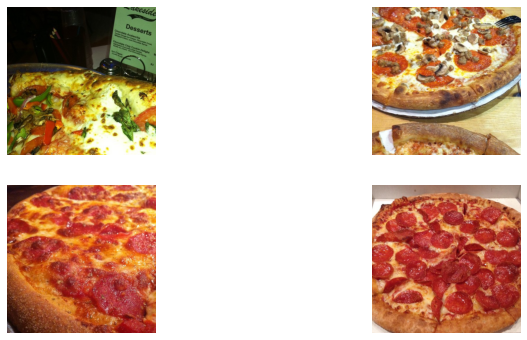

In [38]:
rand_img(train_dir, classname="pizza")

419342.jpg
604162.jpg
3354260.jpg
2722745.jpg


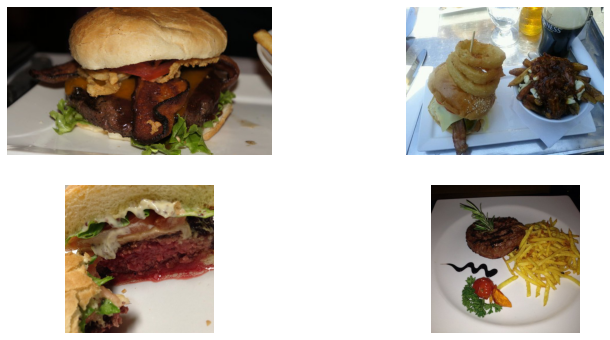

In [39]:
rand_img(train_dir, classname="hamburger")

2237104.jpg
2249869.jpg
1382660.jpg
478897.jpg


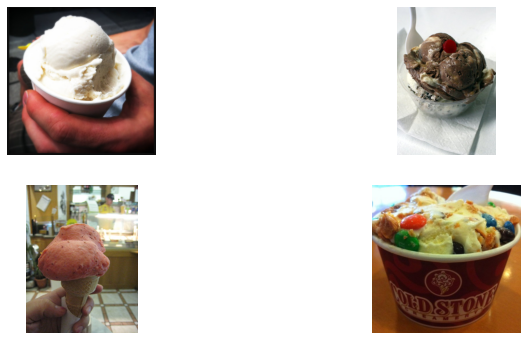

In [40]:
rand_img(test_dir, classname="ice_cream")

# Preprocess Data

In [41]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [42]:
train_datagen = ImageDataGenerator(rescale=1/225.)
test_datagen = ImageDataGenerator(rescale=1/225.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               class_mode = "categorical",
                                               batch_size = 32,
                                               )
test_data =  train_datagen.flow_from_directory(test_dir,
                                               target_size = (224,224),
                                               class_mode = "categorical",
                                               batch_size = 32,
                                               )

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [45]:
train_data.num_classes

10

In [46]:
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"

## Create Call Backs

In [57]:
import datetime
def create_tensorboard_callback(dirname, experiment_name):
  log_dir = dirname + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%M%D-%H%M%S")
  callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  return callback

# Create The Model

In [54]:
def create_model(model_url, num_classes):
  feature_extraction_layer = hub.KerasLayer(model_url,
                                             trainable=False,
                                             name="Feature_extraction_layers",
                                             input_shape=(224,224,3))
  model = tf.keras.Sequential([
      feature_extraction_layer,
      tf.keras.layers.Dense(num_classes, activation="softmax", name="outputlayer")
  ])

  return model

In [58]:
efficientnet = create_model(model_url=efficientnet_url,
                            num_classes=10)
efficientnet.compile(loss="categorical_crossentropy",
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])
efficient_histroy = efficientnet.fit(train_data,
                                     epochs=5,
                                     steps_per_epoch=len(train_data),
                                     validation_data=test_data,
                                     validation_steps=len(test_data),
                                     callbacks=[create_tensorboard_callback(dirname="tensorflow",
                                                                            experiment_name="EfficientNet")])

Epoch 1/5
24/24 [==============================] - 39s 826ms/step - loss: 1.9400 - accuracy: 0.3800 - val_loss: 1.3634 - val_accuracy: 0.6988
Epoch 2/5
24/24 [==============================] - 18s 755ms/step - loss: 1.1205 - accuracy: 0.7667 - val_loss: 0.9159 - val_accuracy: 0.8016
Epoch 3/5
24/24 [==============================] - 18s 763ms/step - loss: 0.8045 - accuracy: 0.8320 - val_loss: 0.7366 - val_accuracy: 0.8396
Epoch 4/5
24/24 [==============================] - 18s 782ms/step - loss: 0.6472 - accuracy: 0.8533 - val_loss: 0.6442 - val_accuracy: 0.8480
Epoch 5/5
24/24 [==============================] - 16s 707ms/step - loss: 0.5476 - accuracy: 0.8853 - val_loss: 0.5898 - val_accuracy: 0.8560


In [ ]:
def plot_loss_curves(history):
"""
Returns separate loss curves for training and validation metrics.
"""
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(len(history.history['loss']))
# Plot loss
plt.plot(epochs, loss, label='training_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()
# Plot accuracy
plt.figure()
plt.plot(epochs, accuracy, label='training_accuracy')
plt.plot(epochs, val_accuracy, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend();
